## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

## Import Dataset

In [2]:
dataset = pd.read_csv('nearest-earth-objects(1910-2024).csv')
dataset.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
dataset.shape

(338199, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
dataset.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [6]:
# Get the number of unique values for each column
dataset.nunique()

neo_id                     33514
name                       33514
absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
orbiting_body                  1
relative_velocity         338189
miss_distance             337826
is_hazardous                   2
dtype: int64

In [7]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

### Droping unwanted columns

In [8]:
dataset.drop(["neo_id", "name", "orbiting_body"], axis=1, inplace=True)
dataset.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


### Dealing with missing values

In [9]:
# Specify the float columns to impute
float_columns_to_impute = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']

# Create an imputer object with the strategy to impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to the specified float columns
dataset[float_columns_to_impute] = imputer.fit_transform(dataset[float_columns_to_impute])

dataset.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["is_hazardous"] = le.fit_transform(dataset["is_hazardous"])

In [11]:
dataset.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [12]:
# Descriptive statistics of the dataset with styled background gradient
dataset.describe().style.background_gradient(cmap = "Purples")

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
count,338199.000000,338199.000000,338199.000000,338199.000000,338199.000000,338199.000000
mean,22.932525,0.157812,0.352878,51060.662908,41535350.932191,0.127623
std,2.911096,0.313872,0.701839,26399.238435,20773990.246103,0.333670
min,9.250000,0.000511,0.001143,203.346433,6745.532516,0.000000
25%,20.740000,0.025384,0.056760,30712.031471,24945397.527133,0.000000
50%,22.800000,0.073207,0.163697,47560.465474,43326743.828348,0.000000
75%,25.100000,0.189041,0.422708,66673.820614,59339605.219975,0.000000
max,33.580000,37.545248,83.953727,291781.106613,74798651.452197,1.000000


### Visualization For EDA

#### What is the distribution of hazardous vs. non-hazardous objects?

<AxesSubplot:xlabel='is_hazardous', ylabel='count'>

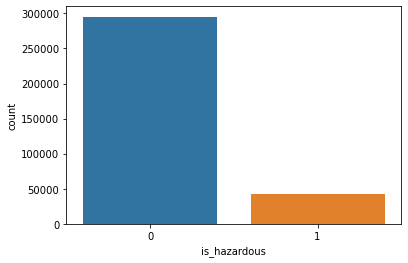

In [13]:
sns.countplot(x='is_hazardous', data=dataset)

#### How do numerical features (absolute_magnitude, estimated_diameter_min, estimated_diameter_max, relative_velocity, miss_distance) correlate with each other and with is_hazardous?

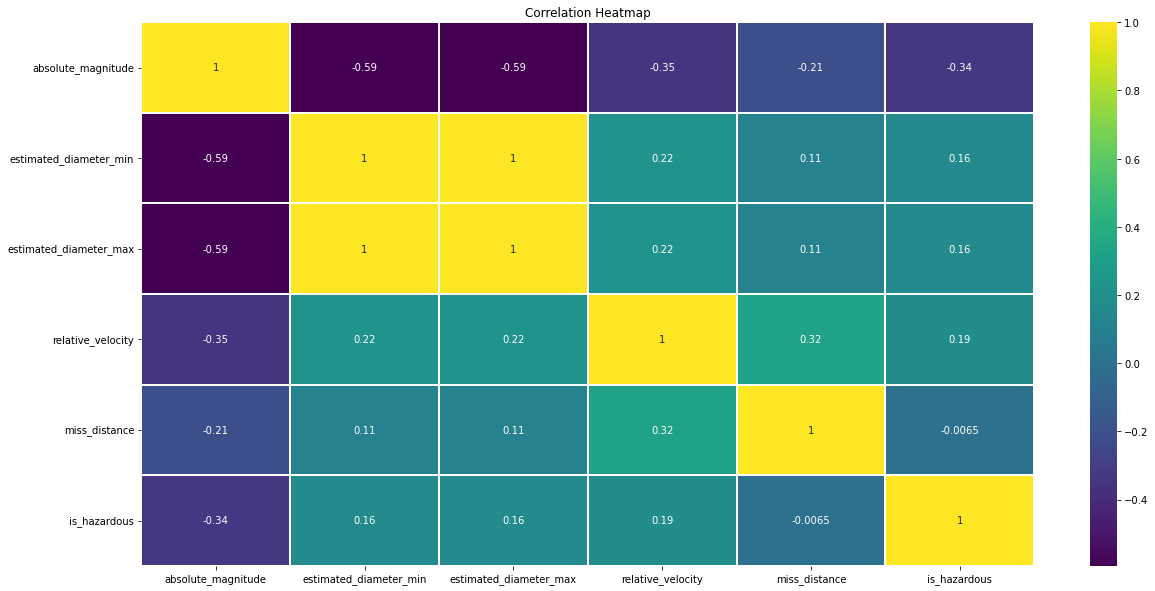

In [14]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), cmap="viridis",annot=True,linewidths=0.1) 
plt.title('Correlation Heatmap')
plt.show()

#### What are the distributions of absolute_magnitude, estimated_diameter_min, estimated_diameter_max, relative_velocity, and miss_distance for hazardous vs. non-hazardous objects?

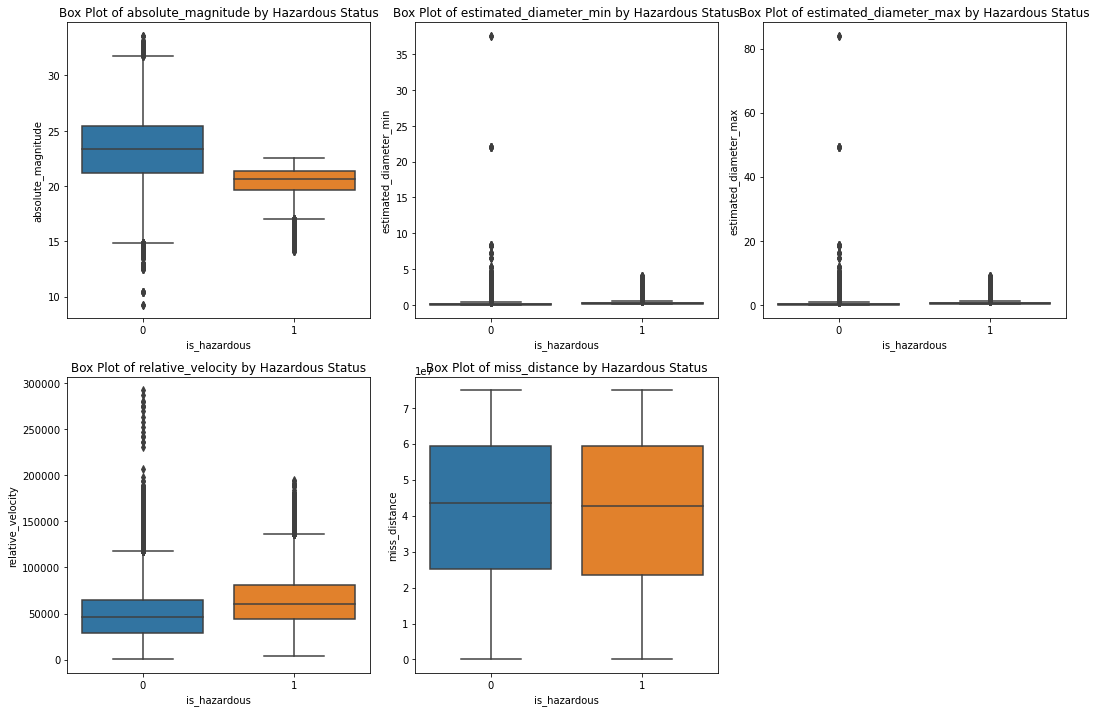

In [15]:
features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_hazardous', y=feature, data=dataset)
    plt.title(f'Box Plot of {feature} by Hazardous Status')
plt.tight_layout()
plt.show()

# the plot suggests that hazardous objects tend to be brighter (lower absolute magnitude) 
#      and have a wider range of brightness compared to non-hazardous objects.

#  the plot suggests that hazardous objects tend to be larger (have a larger estimated minimum diameter) 
#     and have a wider range of sizes compared to non-hazardous objects.

# the plot suggests that hazardous objects tend to be larger (have a larger estimated maximum diameter) 
#      and have a wider range of sizes compared to non-hazardous objects.

#  the plot suggests that hazardous objects tend to approach Earth at higher relative velocities 
#     and have a wider range of velocities compared to non-hazardous objects.

# the plot suggests that hazardous objects tend to approach Earth more closely (have a smaller miss distance) 
#     and have a wider range of miss distances compared to non-hazardous objects.

#### How do pairs of features (miss_distance vs. relative_velocity, etc.) relate to each other and to the hazard classification?

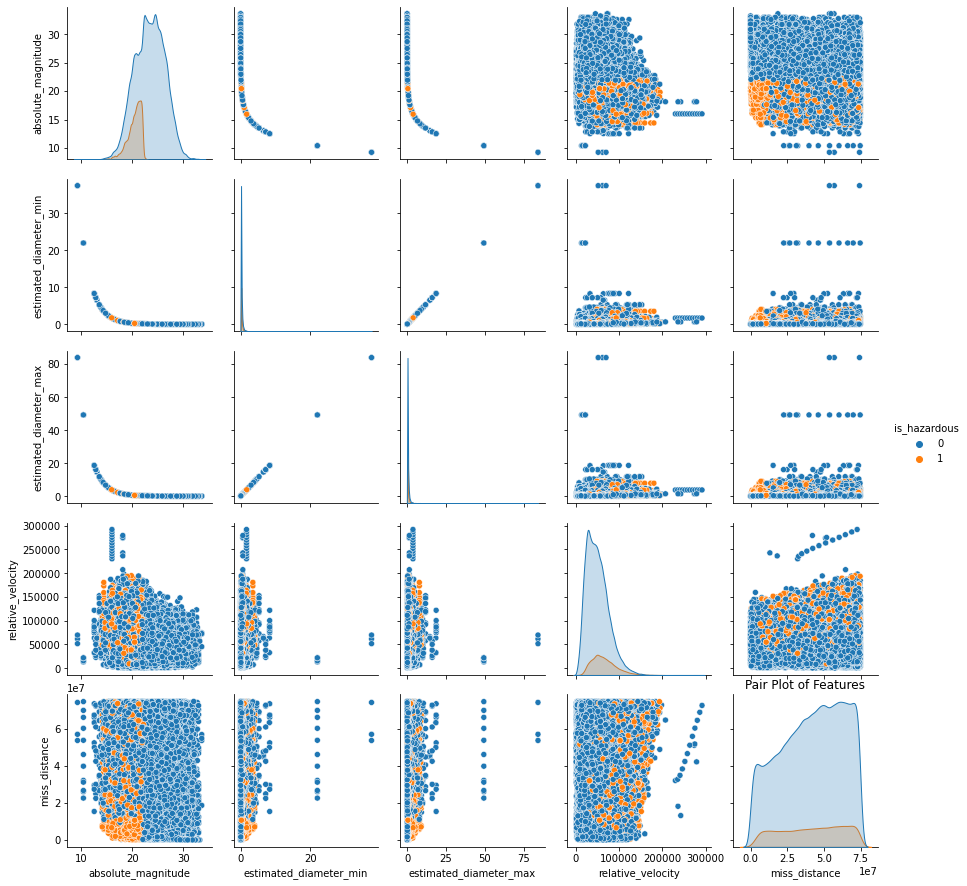

In [16]:
sns.pairplot(dataset, hue='is_hazardous', vars=['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
plt.title('Pair Plot of Features')
plt.show()

#### What are the distributions of features (like absolute_magnitude, estimated_diameter_max, estimated_diameter_min, relative_velocity, miss_distance) for hazardous and non-hazardous objects?

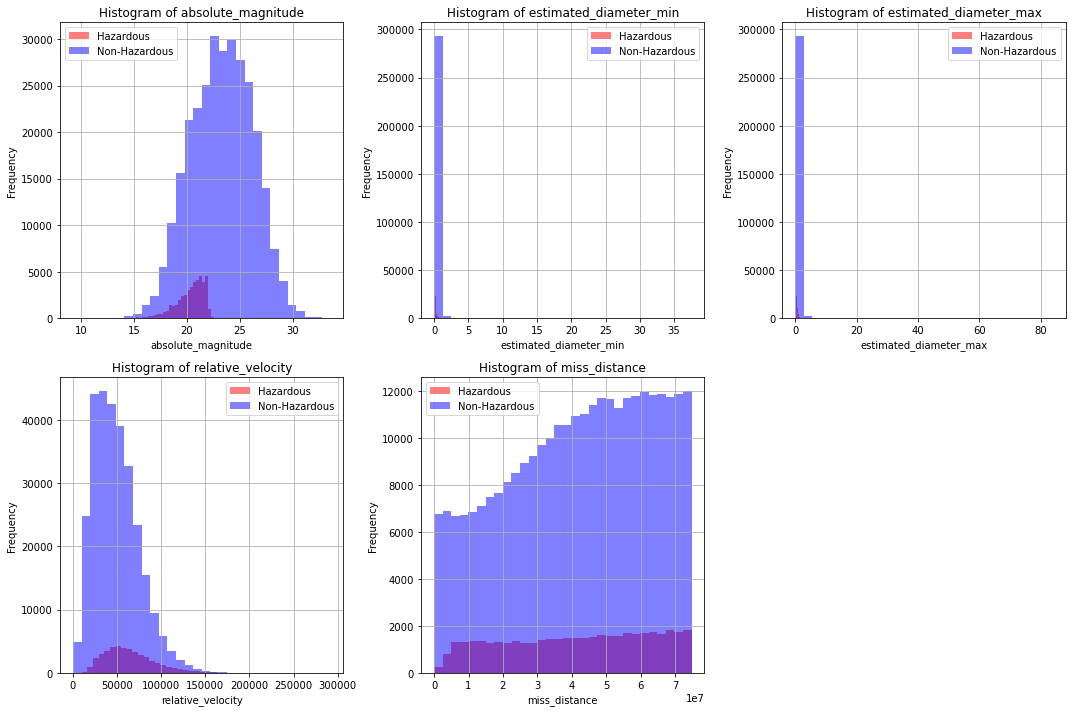

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    dataset[dataset['is_hazardous'] == True][feature].hist(alpha=0.5, bins=30, label='Hazardous', color='red')
    dataset[dataset['is_hazardous'] == False][feature].hist(alpha=0.5, bins=30, label='Non-Hazardous', color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

#### What are the distributions and variances of features like absolute_magnitude, relative_velocity, etc., when split by is_hazardous?

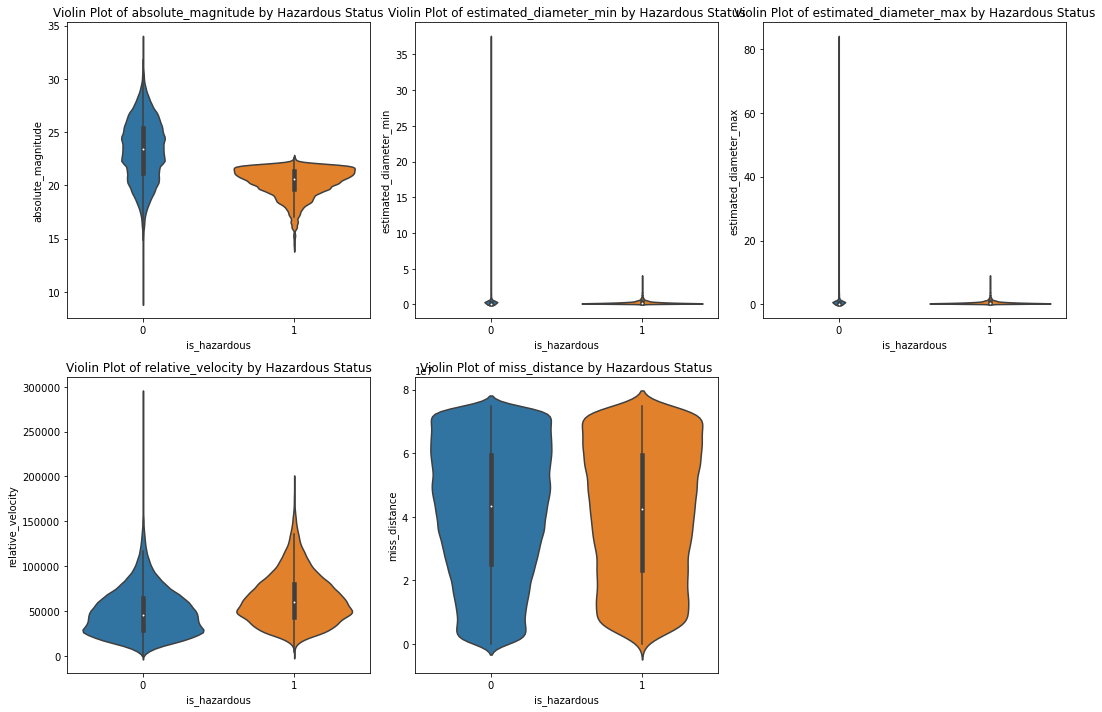

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='is_hazardous', y=feature, data=dataset)
    plt.title(f'Violin Plot of {feature} by Hazardous Status')
plt.tight_layout()
plt.show()

###  Extracting features (X) and target variable (y) from the dataset

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
print(X.shape)
print(y.shape)

(338199, 5)
(338199,)


#### Scaling Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
print(X.shape)

(338199, 5)


### Splitting the dataset into the Training set and Testing set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Handling imbalanced classes

In [24]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [25]:
print("Trainig Data..")
print("The shape of training features: ", X_train_res.shape)
print("The shape of training labels: ", y_train_res.shape)

Trainig Data..
The shape of training features:  (472052, 5)
The shape of training labels:  (472052,)


In [26]:
print("Testing Data..")
print("The shape of testing features: ", X_test.shape)
print("The shape of testing labels: ", y_test.shape)

Testing Data..
The shape of testing features:  (67640, 5)
The shape of testing labels:  (67640,)


## Training the Random Forest model on the Training set

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf_model = RandomForestClassifier(random_state=16)

# Fit the model
rf_model.fit(X_train_res, y_train_res)

# Predict on new data
y_pred = rf_model.predict(X_test)

In [28]:
# Assuming 'new_data' is a DataFrame or array with the same features as X_train
new_data = np.array([[30, 0.19854, 1.896459, 79890.076805, 87792688.3191697]])  # Replace with your actual new data

# Predict the class for new data
new_predictions = rf_model.predict(new_data)
print("Predicted class for new data:", new_predictions)

Predicted class for new data: [0]


In [29]:
from sklearn.metrics import classification_report
target_names = ['is_hazardous']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     59011
           1       0.63      0.70      0.66      8629

    accuracy                           0.91     67640
   macro avg       0.79      0.82      0.81     67640
weighted avg       0.91      0.91      0.91     67640



In [30]:
# import the metrics class
from sklearn import metrics
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # The confusion matrix is a table that visualizes the performance of a classification model by comparing its predicted classes against the actual classes.
cnf_matrix

array([[55554,  3457],
       [ 2622,  6007]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

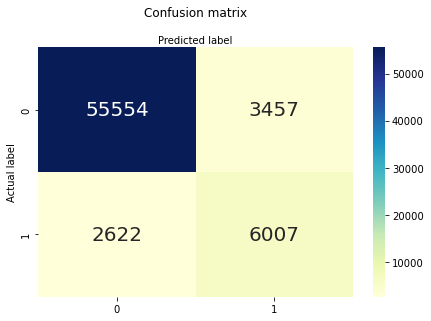

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create a heatmap of the confusion matrix using Seaborn library
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size':20}, cmap="YlGnBu", fmt='g')
# Set the position of the x-axis label to the top
ax.xaxis.set_label_position("top")
# Adjust the layout to prevent overlapping of elements
plt.tight_layout()
# Set the title of the plot
plt.title('Confusion matrix', y=1.1)
# Set the label for the y-axis
plt.ylabel('Actual label')
# Set the label for the x-axis
plt.xlabel('Predicted label')

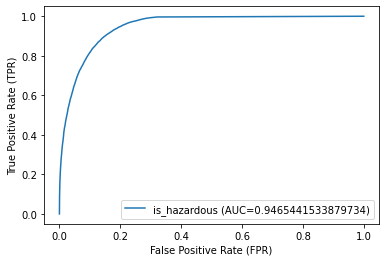

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
# Predict class probabilities for the positive class (customer churn)
y_pred_proba = rf_model.predict_proba(X_test)[::, 1]
# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and ignore thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
# Plot the ROC Curve
plt.plot(fpr, tpr, label="is_hazardous (AUC="+str(auc)+")")  # More descriptive label
plt.plot(auc)
# Add axis labels
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
# Add legend
plt.legend(loc=4)
# Display the ROC Curve
plt.show()

##  Training the Decision Tree Classification model on the Training set

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [35]:
# Assuming 'new_data' is a DataFrame or array with the same features as X_train
new_data = np.array([[30, 0.19854, 1.896459, 79890.076805, 87792688.3191697]])  # Replace with your actual new data

# Predict the class for new data
new_predictions = classifier.predict(new_data)
print("Predicted class for new data:", new_predictions)

Predicted class for new data: [0]


In [36]:
from sklearn.metrics import classification_report
target_names = ['is_hazardous']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     59011
           1       0.55      0.66      0.60      8629

    accuracy                           0.89     67640
   macro avg       0.75      0.79      0.77     67640
weighted avg       0.90      0.89      0.89     67640



In [37]:
# import the metrics class
from sklearn import metrics
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # The confusion matrix is a table that visualizes the performance of a classification model by comparing its predicted classes against the actual classes.
cnf_matrix

array([[54425,  4586],
       [ 2967,  5662]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

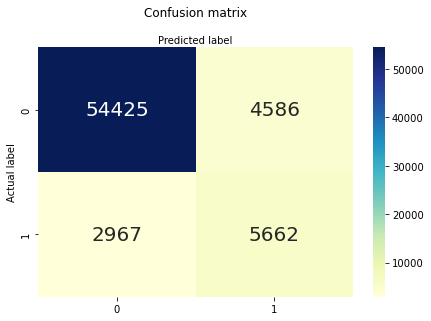

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create a heatmap of the confusion matrix using Seaborn library
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size':20}, cmap="YlGnBu", fmt='g')
# Set the position of the x-axis label to the top
ax.xaxis.set_label_position("top")
# Adjust the layout to prevent overlapping of elements
plt.tight_layout()
# Set the title of the plot
plt.title('Confusion matrix', y=1.1)
# Set the label for the y-axis
plt.ylabel('Actual label')
# Set the label for the x-axis
plt.xlabel('Predicted label')

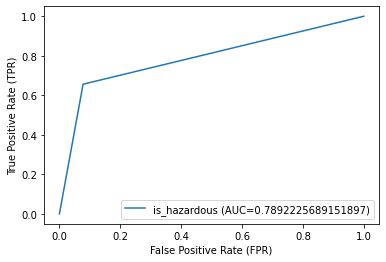

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
# Predict class probabilities for the positive class (customer churn)
y_pred_proba = classifier.predict_proba(X_test)[::, 1]
# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and ignore thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
# Plot the ROC Curve
plt.plot(fpr, tpr, label="is_hazardous (AUC="+str(auc)+")")  # More descriptive label
plt.plot(auc)
# Add axis labels
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
# Add legend
plt.legend(loc=4)
# Display the ROC Curve
plt.show()

## Training the k-Nearest Neighbors (KNN) Classification model on the Training set

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_res, y_train_res)

# Predict on new data
y_pred = knn_model.predict(X_test)

In [41]:
# Assuming 'new_data' is a DataFrame or array with the same features as X_train
new_data = np.array([[30, 0.19854, 1.896459, 79890.076805, 87792688.3191697]])  # Replace with your actual new data

# Predict the class for new data
new_predictions = knn_model.predict(new_data)
print("Predicted class for new data:", new_predictions)

Predicted class for new data: [0]


In [42]:
from sklearn.metrics import classification_report
target_names = ['is_hazardous']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89     59011
           1       0.41      0.77      0.53      8629

    accuracy                           0.83     67640
   macro avg       0.68      0.80      0.71     67640
weighted avg       0.89      0.83      0.85     67640



In [43]:
# import the metrics class
from sklearn import metrics
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # The confusion matrix is a table that visualizes the performance of a classification model by comparing its predicted classes against the actual classes.
cnf_matrix

array([[49342,  9669],
       [ 2015,  6614]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

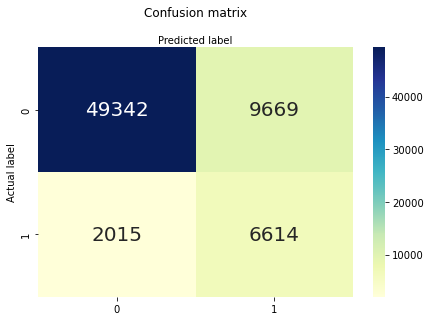

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create a heatmap of the confusion matrix using Seaborn library
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size':20}, cmap="YlGnBu", fmt='g')
# Set the position of the x-axis label to the top
ax.xaxis.set_label_position("top")
# Adjust the layout to prevent overlapping of elements
plt.tight_layout()
# Set the title of the plot
plt.title('Confusion matrix', y=1.1)
# Set the label for the y-axis
plt.ylabel('Actual label')
# Set the label for the x-axis
plt.xlabel('Predicted label')

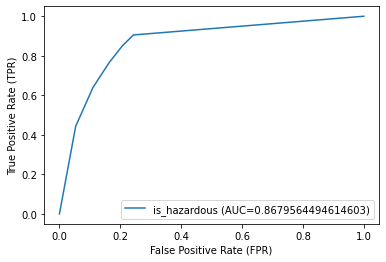

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
# Predict class probabilities for the positive class (customer churn)
y_pred_proba = knn_model.predict_proba(X_test)[::, 1]
# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and ignore thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
# Plot the ROC Curve
plt.plot(fpr, tpr, label="is_hazardous (AUC="+str(auc)+")")  # More descriptive label
plt.plot(auc)
# Add axis labels
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
# Add legend
plt.legend(loc=4)
# Display the ROC Curve
plt.show()

##  Training the Logistic Regression model on the Training set

In [46]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train_res, y_train_res)
# Make predictions on the testing data using the logistic regression model
y_pred = logreg.predict(X_test)

In [47]:
# Assuming 'new_data' is a DataFrame or array with the same features as X_train
new_data = np.array([[30, 0.19854, 1.896459, 79890.076805, 87792688.3191697]])  # Replace with your actual new data

# Predict the class for new data
new_predictions = logreg.predict(new_data)
print("Predicted class for new data:", new_predictions)

Predicted class for new data: [0]


In [48]:
from sklearn.metrics import classification_report
target_names = ['is_hazardous']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     59011
           1       0.31      0.88      0.46      8629

    accuracy                           0.74     67640
   macro avg       0.64      0.80      0.64     67640
weighted avg       0.89      0.74      0.78     67640



In [49]:
# import the metrics class
from sklearn import metrics
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # The confusion matrix is a table that visualizes the performance of a classification model by comparing its predicted classes against the actual classes.
cnf_matrix

array([[42213, 16798],
       [ 1017,  7612]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

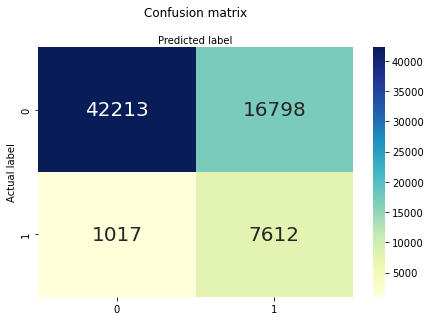

In [50]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create a heatmap of the confusion matrix using Seaborn library
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size':20}, cmap="YlGnBu", fmt='g')
# Set the position of the x-axis label to the top
ax.xaxis.set_label_position("top")
# Adjust the layout to prevent overlapping of elements
plt.tight_layout()
# Set the title of the plot
plt.title('Confusion matrix', y=1.1)
# Set the label for the y-axis
plt.ylabel('Actual label')
# Set the label for the x-axis
plt.xlabel('Predicted label')

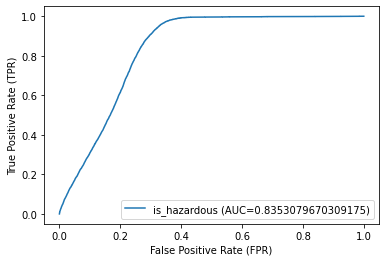

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
# Predict class probabilities for the positive class (customer churn)
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and ignore thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
# Plot the ROC Curve
plt.plot(fpr, tpr, label="is_hazardous (AUC="+str(auc)+")")  # More descriptive label
plt.plot(auc)
# Add axis labels
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
# Add legend
plt.legend(loc=4)
# Display the ROC Curve
plt.show()

## Training the Naive Bayes Classification model on the Training set

In [52]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_res, y_train_res)

# Predict on new data
y_pred = nb_model.predict(X_test)


In [53]:
from sklearn.metrics import classification_report
target_names = ['is_hazardous']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     59011
           1       0.30      0.88      0.45      8629

    accuracy                           0.73     67640
   macro avg       0.64      0.79      0.63     67640
weighted avg       0.89      0.73      0.77     67640



## Training the Support Vector Machines (SVM) Classification model on the Training set

#### It took a lot of time to be excuted so, i commented it 

In [54]:
# from sklearn.svm import SVC

# # Initialize the SVM model
# svm_model = SVC(kernel='linear', random_state=16)

# # Fit the model
# svm_model.fit(X_train, y_train)

# # Predict on new data
# y_pred = svm_model.predict(X_test)